In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [17]:
image_dir="Downloads\Banana FCN\Images"
mask_dir="Downloads\Banana FCN\Mask"


In [18]:
image_ds=tf.keras.utils.image_dataset_from_directory(
    image_dir,
    labels=None,
    color_mode="rgb",
    image_size=(128,128),
    batch_size=32).map(lambda x: tf.cast(x, tf.float32)/255.0)

mask_ds=tf.keras.utils.image_dataset_from_directory(
    mask_dir,
    labels=None,
    color_mode="grayscale",
    image_size=(128,128),
    batch_size=32).map(lambda x: tf.cast(x, tf.float32)/255.0)


Found 82 files belonging to 1 classes.
Found 82 files belonging to 1 classes.


In [19]:
train_ds = tf.data.Dataset.zip((image_ds,mask_ds))


In [20]:
inputs=Input((128,128,3))
x=Conv2D(32,(3,3), activation='relu',padding='same')(inputs)
x=MaxPooling2D((2,2))(x)
x=Conv2D(64,(3,3), activation='relu', padding='same')(x)
x=MaxPooling2D((2,2))(x)
x=Conv2DTranspose(64,(3,3), strides=2, activation='relu', padding='same')(x)
x=Conv2DTranspose(64,(3,3), strides=2, activation='relu', padding='same')(x)
outputs=Conv2D(1,(1,1), activation='sigmoid')(x)
model=Model(inputs,outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 64, 64, 64)       36928 

In [21]:
model.fit(train_ds, epochs=5)

Epoch 1/5
3/3 [==============================] - 6s 1s/step - loss: 0.6911 - accuracy: 0.4323
Epoch 2/5
3/3 [==============================] - 4s 1s/step - loss: 0.6692 - accuracy: 0.6776
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: 0.6279 - accuracy: 0.6776
Epoch 4/5
3/3 [==============================] - 4s 1s/step - loss: 0.6052 - accuracy: 0.6776
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 0.6013 - accuracy: 0.6776


1/1 [==============================] - 0s 157ms/step


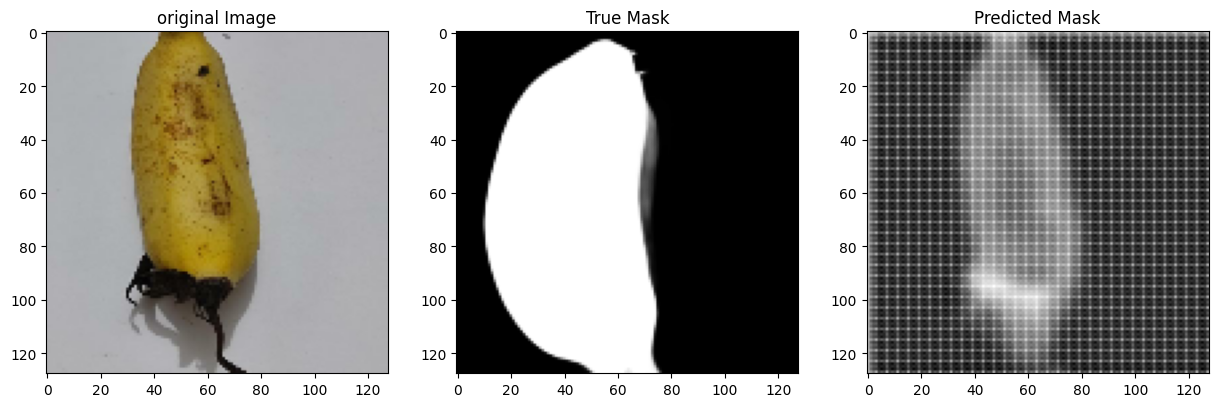

In [22]:
for images, masks in train_ds.take(1):
    sample_image=images[0]
    true_mask=masks[0]
    pred_mask= model.predict(tf.expand_dims(sample_image,axis=0))[0]
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title("original Image")
    plt.imshow(sample_image)
    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(true_mask.numpy().squeeze(), cmap="gray")

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(pred_mask.squeeze(), cmap="gray")

    plt.show()